# Baseline model
Model pour s'habituer au dataset

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
#pip install pandas-profiling
import pandas_profiling
import matplotlib.pyplot as plt
# pip install scikit-plot
import scikitplot as skplt
#pip install missingno
import missingno as msno
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import Imputer
%matplotlib inline

#pip install xgboost
import xgboost as xgb
#pip install lightgbm
import lightgbm as lgb
import math
import gc 
pd.options.display.max_columns = 99

In [4]:
def reduce_mem_usage(df):
    """ iterate through all the columns of a dataframe and modify the data type
        to reduce memory usage.        
    """
    start_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage of dataframe is {:.2f} MB'.format(start_mem))
    
    for col in df.columns:
        col_type = df[col].dtype
        
        if col_type != object:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)
        else:
            df[col] = df[col].astype('category')

    end_mem = df.memory_usage().sum() / 1024**2
    print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
    print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))
    
    return df


def import_data(file):
    """create a dataframe and optimize its memory usage"""
    df = pd.read_csv(file, parse_dates=True, keep_date_col=True)
    df = reduce_mem_usage(df)
    return df

In [ ]:
#data_HomeCredit_columns_description = pd.read_csv('../data/HomeCredit_columns_description.csv')


On nettoie le nom des colonnes car, c'est pénible de manipuler les noms avec des majuscules

data_bureau_balance

In [ ]:
# data_bureau_balance = pd.read_csv('../data/bureau_balance.csv')
# data_bureau_balance = reduce_mem_usage(data_bureau_balance)
# data_bureau_balance.columns = [str.lower(x) for x in data_bureau_balance.columns]
# data_bureau_balance = pd.get_dummies(data_bureau_balance)
# bureau_bal = data_bureau_balance.groupby('sk_id_bureau').agg(['min','max','mean','count','sum','nunique','std'])
# bureau_bal.columns = ["_".join(x) for x in bureau_bal.columns.ravel()]
# bureau_bal.columns = [ 'bureau_bal_' + x for x in bureau_bal.columns]
# del(data_bureau_balance)
# gc.collect()
# bureau_bal.head()

installments_payments

In [ ]:
# data_installments_payments = pd.read_csv('../data/installments_payments.csv')
# data_installments_payments = reduce_mem_usage(data_installments_payments)
# data_installments_payments.columns = [str.lower(x) for x in data_installments_payments.columns]
# data_installments_payments = pd.get_dummies(data_installments_payments)
# install = data_installments_payments.groupby('sk_id_curr').agg(['min','max','mean','count','sum','nunique','std'])
# install.columns = ["_".join(x) for x in install.columns.ravel()]
# install.columns = [ 'install_' + x for x in install.columns]
# del(data_installments_payments)
# gc.collect()
# install.head()

POS_CASH_balance

In [ ]:
# data_POS_CASH_balance = pd.read_csv('../data/POS_CASH_balance.csv')
# data_POS_CASH_balance = reduce_mem_usage(data_POS_CASH_balance)
# data_POS_CASH_balance.columns = [str.lower(x) for x in data_POS_CASH_balance.columns]
# data_POS_CASH_balance.drop('sk_id_prev',axis=1,inplace=True)
# data_POS_CASH_balance = pd.get_dummies(data_POS_CASH_balance)
# cash = data_POS_CASH_balance.groupby('sk_id_curr').agg(['min','max','mean','count','sum','nunique','std'])
# #On supprime les multi index, et on ajoute un préfixe pour mieux identifier les variables
# cash.columns = ["_".join(x) for x in cash.columns.ravel()]
# cash.columns = [ 'cash_' + x for x in cash.columns]
# del(data_POS_CASH_balance)
# gc.collect()
# cash.head()

bureau

In [ ]:
# data_bureau = pd.read_csv('../data/bureau.csv')
# data_bureau = reduce_mem_usage(data_bureau)
# data_bureau.columns = [str.lower(x) for x in data_bureau.columns]
# data_bureau = pd.get_dummies(data_bureau)
# #JOIN
# data_bureau = data_bureau.set_index('sk_id_bureau').join(bureau_bal,how='left')
# data_bureau.reset_index(inplace=True)
# data_bureau.drop('sk_id_bureau',axis=1,inplace=True)

# bureau = data_bureau.groupby('sk_id_curr').agg(['min','max','mean','count','sum','nunique','std'])
# bureau.columns = ["_".join(x) for x in bureau.columns.ravel()]
# bureau.columns = [ 'bureau_' + x for x in bureau.columns]
# del(data_bureau)
# gc.collect()
# bureau.head()

credit_card_balance

In [ ]:
# data_credit_card_balance  = pd.read_csv('../data/credit_card_balance.csv')
# data_credit_card_balance = reduce_mem_usage(data_credit_card_balance)
# data_credit_card_balance.columns = [str.lower(x) for x in data_credit_card_balance.columns]
# data_credit_card_balance = pd.get_dummies(data_credit_card_balance)
# card_credit = data_credit_card_balance.groupby('sk_id_curr').agg(['min','max','mean','count','sum','nunique','std'])
# card_credit.columns = ["_".join(x) for x in card_credit.columns.ravel()]
# card_credit.columns = [ 'card_credit_' + x for x in card_credit.columns]
# del(data_credit_card_balance)
# gc.collect()
# card_credit.head()

previous_application

In [ ]:
# data_previous_application = pd.read_csv('../data/previous_application.csv')
# data_previous_application = reduce_mem_usage(data_previous_application)
# data_previous_application['DAYS_LAST_DUE'].replace(365243, np.nan, inplace=True)
# data_previous_application['DAYS_TERMINATION'].replace(365243, np.nan, inplace=True)
# data_previous_application['DAYS_FIRST_DRAWING'].replace(365243, np.nan, inplace=True)
# data_previous_application['DAYS_FIRST_DUE'].replace(365243, np.nan, inplace=True)
# data_previous_application['DAYS_LAST_DUE_1ST_VERSION'].replace(365243, np.nan, inplace=True)
# data_previous_application.columns = [str.lower(x) for x in data_previous_application.columns]
# data_previous_application = pd.get_dummies(data_previous_application)
# previous_app = data_previous_application.groupby('sk_id_curr').agg(['min','max','mean','count','sum','nunique','std'])
# previous_app.columns = ["_".join(x) for x in previous_app.columns.ravel()]
# previous_app.columns = [ 'previous_app_' + x for x in previous_app.columns]
# del(data_previous_application)
# gc.collect()
# previous_app.head()

Join

In [ ]:
cash = pd.read_csv('../tmp/cash.csv')
bureau = pd.read_csv('../tmp/bureau.csv')
card_credit = pd.read_csv('../tmp/card_credit.csv')
install = pd.read_csv('../tmp/install.csv')

# cash.sk_id_curr = cash.sk_id_curr.astype(str)
# bureau.sk_id_curr = bureau.sk_id_curr.astype(str)
# card_credit.sk_id_curr = card_credit.sk_id_curr.astype(str)
# install.sk_id_curr = install.sk_id_curr.astype(str)

data_application_test = pd.read_csv('../data/application_test.csv')
data_application_train = pd.read_csv('../data/application_train.csv')

# data_application_train = data_application_train.sk_id_curr.astype(str)
# data_application_test = data_application_test.sk_id_curr.astype(str)

data_pool = data_application_train.append(data_application_test,sort=False)
data_pool = reduce_mem_usage(data_pool)
del(data_application_test)
del(data_application_train)
gc.collect()
data_pool.columns = [str.lower(x) for x in data_pool.columns]

data_pool = data_pool.set_index('sk_id_curr').join(cash,how='left')
data_pool = data_pool.join(bureau.set_index('sk_id_curr'),how='left')
data_pool = data_pool.join(card_credit.set_index('sk_id_curr'),how='left')
data_pool = data_pool.join(install.set_index('sk_id_curr'),how='left')

del(cash)
del(bureau)
del(card_credit)
del(install)
gc.collect()

### Analyse 

In [ ]:
# data_pool.to_csv("pool.csv")

In [ ]:
data_cleaned.info()

## Data cleaning

Très simple on transforme toutes les variables qualitatives en variables booléenne.

In [ ]:
# data_cleaned = pd.get_dummies(data_pool)
# del(data_pool)
# gc.collect()
# data_cleaned.drop('sk_id_curr',axis=1,inplace=True)
# data_cleaned = data_cleaned.reset_index()

In [ ]:
# data_cleaned.head()

### Feature Selection
Chris Albon

Seuil à modifier si besoin. Pour l'instant le suppression des variables sembles baisser les perf du modèle

In [ ]:
# data_cleaned['credit_income_percent'] = data_cleaned['amt_credit'] / data_cleaned['amt_income_total']
# data_cleaned['annuity_income_percent'] = data_cleaned['amt_annuity'] / data_cleaned['amt_income_total']
# data_cleaned['credit_term'] = data_cleaned['amt_annuity'] / data_cleaned['amt_credit']
# data_cleaned['days_employed_percent'] = data_cleaned['days_employed'] / data_cleaned['days_birth']
# data_cleaned['annuity_length'] = data_cleaned['amt_credit'] / data_cleaned['amt_annuity']
# data_cleaned['new_credit_to_goods_ratio'] = data_cleaned['amt_credit'] / data_cleaned['amt_goods_price']
# data_cleaned['income_per_person'] = data_cleaned['amt_income_total'] / data_cleaned['cnt_fam_members']
# data_cleaned['income_credit_perc'] = data_cleaned['amt_income_total'] / data_cleaned['amt_credit']
# data_cleaned['annuity_income_perc'] = np.sqrt(data_cleaned['amt_annuity'] / (1 + data_cleaned['amt_income_total']))
# data_cleaned['children_ratio'] = data_cleaned['cnt_children'] / data_cleaned['cnt_fam_members']
# data_cleaned['inc_per_child'] = data_cleaned['amt_income_total'] / (1 + data_cleaned['cnt_children'])
# data_cleaned['sources_prod'] = data_cleaned['ext_source_1'] * data_cleaned['ext_source_2'] * data_cleaned['ext_source_3']
# data_cleaned['car_to_birth_ratio'] = data_cleaned['own_car_age'] / data_cleaned['days_birth']
# data_cleaned['car_to_employ_ratio'] = data_cleaned['own_car_age'] / data_cleaned['days_employed']
# data_cleaned['phone_to_birth_ratio'] = data_cleaned['days_last_phone_change'] / data_cleaned['days_birth']
# data_cleaned['phone_to_employ_ratio'] = data_cleaned['days_last_phone_change'] / data_cleaned['days_employed'] 

In [ ]:
# #Features sans importance et comportant des valeurs aberrantes à cause des agrégation
# data_cleaned.drop([ 'bureau_days_credit_enddate_sum',
#          'bureau_days_enddate_fact_sum',
#          'install_days_instalment_sum',
#          'install_days_entry_payment_sum'],axis=1,inplace=True)

# target = data_cleaned['target']
# data_cleaned.drop('target',axis=1,inplace=True)

# #Corrélation
# corr_matrix = data_cleaned.corr().abs()
# upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# to_drop = [column for column in upper.columns if any(upper[column] > 0.9)]
# data_cleaned.drop(columns=to_drop,axis=1,inplace=True)

# #Missing values
# data_missing = (data_cleaned.isnull().sum() / len(data_cleaned)).sort_values(ascending = False)
# data_missing = data_missing.index[data_missing > 0.75]
# all_missing = list(set(set(data_missing)))
# print('There are %d columns with more than 75%% missing values' % len(all_missing))
# data_cleaned.drop(columns = all_missing,inplace=True)

# print("Final shape")
# print(data_cleaned.shape)

# data_cleaned['target'] = target
# del(target)


# test = data_cleaned[data_cleaned.target.isnull()]
# train = data_cleaned[data_cleaned.target.notnull()]

# del(data_cleaned)
# gc.collect()

In [ ]:
# train.to_csv("train.csv")

## Modèle

Regression logistique pour commencer.  
Les prochain modèles à tester seront :
- Xgboost
- LightGBM

In [6]:
train = pd.read_csv('../tmp/train.csv')

In [7]:
train = reduce_mem_usage(train)
train.fillna(train.median(),inplace=True)

Memory usage of dataframe is 1381.87 MB
Memory usage after optimization is: 335.20 MB
Decreased by 75.7%


In [8]:
c = train.columns
train.dropna(axis=1,how='all',inplace=True)
train = np.nan_to_num(train)
train = pd.DataFrame(train)
train.columns = c

In [9]:
np.where(train.values >= np.finfo(np.float64).max)

(array([     0,      0,      1, ..., 307509, 307510, 307510]),
 array([127, 131, 127, ..., 131, 127, 131]))

In [10]:
np.where(train.isnull() == True)

(array([], dtype=int64), array([], dtype=int64))

In [11]:
target = train.target
#On drop l'ID mais je n'ai pas vérifier s'il influe sur le résultat
train = train.drop(['sk_id_curr','target'],axis=1)
col = train.columns

In [12]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
train = scaler.fit_transform(train)
train = pd.DataFrame(train)
train.columns = col

/home/brivael/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/brivael/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/brivael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:694: RuntimeWarning: invalid value encountered in true_divide
  X /= self.scale_


Split du dataset d'entrainement. Un set de validation sera crée par la suite

In [13]:
X_train, X_test, y_train, y_test = train_test_split(train, target, test_size=0.5, random_state=1)
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=1)

Baseline LogReg

In [14]:
# regleg = LogisticRegression()
# pred = regleg.fit(X_train,y_train).predict_proba(X_test)

In [15]:
# print(roc_auc_score(y_test, pred[:,1]))
# # print(cross_val_score(LogisticRegression(),X_train,y_train,cv = 5,scoring='roc_auc'))

In [16]:
# skplt.metrics.plot_roc(y_test, pred)

Models

In [17]:
# xgbb = xgb.XGBClassifier()
# eval_set = [(X_train, y_train), (X_val, y_val)]
# prediction_xgb = xgbb.fit(X_train,y_train,eval_metric="auc",early_stopping_rounds=30, eval_set=eval_set, verbose=False).predict_proba(X_test)
# print(roc_auc_score(y_test, prediction_xgb[:,1]))
# print("***")
# print(cross_val_score(xgb.XGBClassifier(),train,target,cv = 5,scoring='roc_auc'))

In [18]:
# xgb.plot_importance(booster=xgbb,ax=None,max_num_features=20)

In [19]:
lightgbm = lgb.LGBMClassifier()
prediction_lgb = lightgbm.fit(X_train,y_train).predict_proba(X_test)
print(roc_auc_score(y_test, prediction_lgb[:,1]))
# print(cross_val_score(lgb.LGBMClassifier(),X_train,y_train,cv = 15,scoring='roc_auc'))

0.7705208613508812


In [20]:
# skplt.metrics.plot_roc(y_test, prediction_lgb)

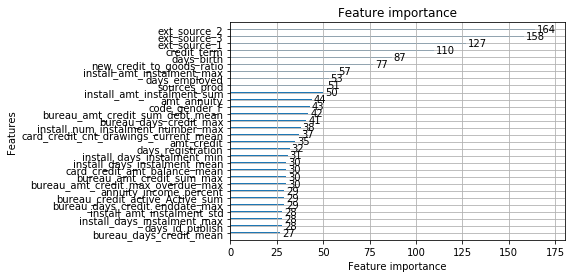

In [21]:
lgb.plot_importance(lightgbm,max_num_features=30)

## Submission  
Il manque des occurence pour le dataset test. On rajoute donc les colonnes du dataset d'entrainement dans celui du test.

In [22]:
data_sample_submission = pd.read_csv('../data/sample_submission.csv')

In [23]:
test  = pd.read_csv('../tmp/test.csv')

In [24]:
test.dropna(axis=1,how='all',inplace=True)
c = test.columns
test = np.nan_to_num(test)
test = pd.DataFrame(test)
test.columns = c

In [25]:
test.head()

,sk_id_curr,cnt_children,amt_income_total,amt_credit,amt_annuity,region_population_relative,days_birth,days_employed,days_registration,days_id_publish,own_car_age,flag_mobil,flag_work_phone,flag_cont_mobile,flag_phone,flag_email,cnt_fam_members,region_rating_client,hour_appr_process_start,reg_region_not_live_region,reg_region_not_work_region,live_region_not_work_region,reg_city_not_live_city,reg_city_not_work_city,live_city_not_work_city,ext_source_1,ext_source_2,ext_source_3,apartments_avg,basementarea_avg,years_beginexpluatation_avg,years_build_avg,commonarea_avg,elevators_avg,entrances_avg,floorsmax_avg,floorsmin_avg,landarea_avg,nonlivingapartments_avg,nonlivingarea_avg,obs_30_cnt_social_circle,def_30_cnt_social_circle,def_60_cnt_social_circle,days_last_phone_change,flag_document_2,flag_document_3,flag_document_4,flag_document_5,flag_document_6,...,organization_type_Mobile,organization_type_Other,organization_type_Police,organization_type_Postal,organization_type_Realtor,organization_type_Religion,organization_type_Restaurant,organization_type_School,organization_type_Security,organization_type_Security Ministries,organization_type_Self-employed,organization_type_Services,organization_type_Telecom,organization_type_Trade: type 1,organization_type_Trade: type 2,organization_type_Trade: type 3,organization_type_Trade: type 4,organization_type_Trade: type 5,organization_type_Trade: type 6,organization_type_Trade: type 7,organization_type_Transport: type 1,organization_type_Transport: type 2,organization_type_Transport: type 3,organization_type_Transport: type 4,organization_type_University,fondkapremont_mode_not specified,fondkapremont_mode_org spec account,fondkapremont_mode_reg oper account,fondkapremont_mode_reg oper spec account,housetype_mode_block of flats,housetype_mode_specific housing,housetype_mode_terraced house,wallsmaterial_mode_Block,wallsmaterial_mode_Mixed,wallsmaterial_mode_Monolithic,wallsmaterial_mode_Others,wallsmaterial_mode_Panel,"wallsmaterial_mode_Stone, brick",wallsmaterial_mode_Wooden,emergencystate_mode_Yes,credit_income_percent,annuity_income_percent,credit_term,new_credit_to_goods_ratio,income_per_person,income_credit_perc,sources_prod,car_to_employ_ratio,phone_to_employ_ratio
0,100001.0,0.0,135000.0,568800.0,20560.5,0.01884,-19241.0,-2329.0,-5170.0,-812.0,0.0,1.0,0.0,1.0,0.0,1.0,2.0,2.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,0.7524,0.7896,0.1595,0.0660,0.0590,0.973,0.000,0.0000,0.00,0.138,0.125,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0,-1740.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,4.213333,0.152300,0.036147,1.2640,67500.0,0.237342,0.09480,0.000000,0.747102
1,100005.0,0.0,99000.0,222768.0,17370.0,0.03580,-18064.0,-4469.0,-9120.0,-1623.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5650,0.2917,0.4329,0.0000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.000,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.250182,0.175455,0.077974,1.2376,49500.0,0.444409,0.07135,0.000000,-0.000000
2,100013.0,0.0,202500.0,663264.0,69777.0,0.01910,-20038.0,-4458.0,-2176.0,-3503.0,5.0,1.0,0.0,1.0,0.0,0.0,2.0,2.0,14.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0000,0.6997,0.6110,0.0000,0.0000,0.000,0.000,0.0000,0.00,0.000,0.000,0.0000,0.0000,0.0000,0.00,0.0,0.0,0.0,-856.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.275378,0.344578,0.105202,1.0528,101250.0,0.305308,0.00000,-0.001122,0.192014
3,100028.0,2.0,315000.0,1575000.0,49018.5,0.02640,-13976.0,-1866.0,-2000.0,-4208.0,0.0,1.0,0.0,1.0,1.0,0.0,4.0,2.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5260,0.5100,0.6130,0.3052,0.1974,0.997,0.959,0.116

In [26]:
data_sample_submission.head()

,SK_ID_CURR,TARGET
0,100001,0.5
1,100005,0.5
2,100013,0.5
3,100028,0.5
4,100038,0.5


In [27]:
# test.reset_index(inplace=True)
test.drop(['sk_id_curr'],axis=1,inplace=True)
test.fillna(test.median(),inplace=True)
c_test = test.columns
test = scaler.fit_transform(test)
test = pd.DataFrame(test)
test.columns = c_test

/home/brivael/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:70: RuntimeWarning: overflow encountered in reduce
  ret = umr_sum(arr, axis, dtype, out, keepdims)
/home/brivael/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:32: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims)
/home/brivael/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:102: RuntimeWarning: overflow encountered in reduce
  arrmean = umr_sum(arr, axis, dtype, keepdims=True)
/home/brivael/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:694: RuntimeWarning: invalid value encountered in true_divide
  X /= self.scale_


In [29]:
finalclf = lgb.LGBMClassifier()
finalclf.fit(train,target)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
        learning_rate=0.1, max_depth=-1, min_child_samples=20,
        min_child_weight=0.001, min_split_gain=0.0, n_estimators=100,
        n_jobs=-1, num_leaves=31, objective=None, random_state=None,
        reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
        subsample_for_bin=200000, subsample_freq=1)

In [30]:
prediction = finalclf.predict_proba(test)
data_sample_submission['TARGET'] = prediction[:,1]

In [31]:
data_sample_submission.to_csv('sequence.csv',index=False)